In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
from src.utils import is_divisible_by, assert_is_positive

In [11]:
v = 1
beta = 4
dy = 0.05
dx = 0.02 # tau
theta = 3/4
x_lst = dx * np.array([5, 10, 15, 20, 25, 10000]) #FIXME: type

0.0
-1.055606809242201e-05
-1.8136013389285724e-05


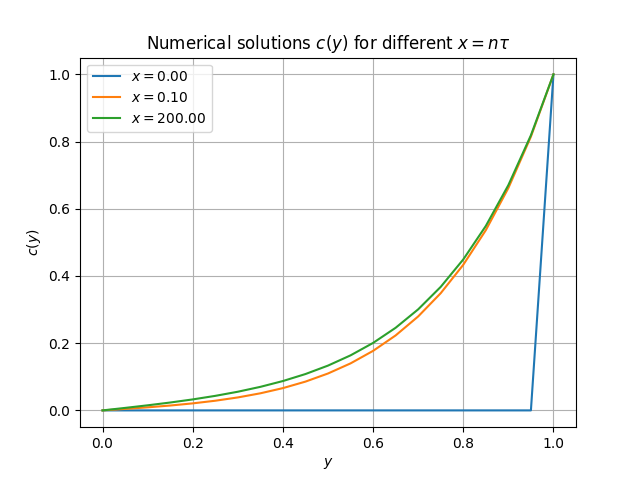

In [12]:
%matplotlib widget
plt.clf()

# Verify constants
assert_is_positive(v, 'v')
assert_is_positive(dy, 'dy')
assert is_divisible_by(1, dy), 'dy must divide 1.'
assert_is_positive(dx, 'dx')
assert 0 <= theta <= 1
assert all(is_divisible_by(x, dx) for x in x_lst), 'All x values must be divisible by dx.'
assert sorted(x_lst)[0] >= 0, 'All x values must be nonnegative.'

N = int(1 / dy) - 1
num_iterations = int(sorted(x_lst)[-1] / dx)
y = np.linspace(0, 1, N + 2, dtype=np.float64) #FIXME: dtype?

def create_matrix_A(*, n: int = N, v: float = v, dy: float = dy, beta: float = beta):
    factor1 = -1 / (v * (dy**2))
    factor2 = -beta**2 / v

    main_diag = 2 * np.ones(n + 1)
    off_diag = -1 * np.ones(n)
    
    matrix1 = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
    matrix2 = np.eye(n + 1)

    A = factor1 * matrix1 + factor2 * matrix2
    A[0, 1] = -2 # Neumann boundary condition at y=0
    return A

def create_r(*, n: int = N):
    r = np.zeros(n + 1) # r is a constant as it does not depend on x
    #TODO: klopt dit?
    r[-1] = 1 / dy**2 # Dirichlet boundary condition at y=1
    return r

def create_u_0(*, n: int = N):
    u_0 = np.zeros(n + 1) # Dirichlet boundary condition at x=0
    return u_0

A = create_matrix_A()
r = create_r()

def theta_method(
    *,
    u_n: NDArray[np.float64],
    A: NDArray[np.float64] = A,
    r: NDArray[np.float64] = r,
    dx: float = dx,
    theta: float = theta
) -> NDArray[np.float64]:
    I = np.eye(N + 1)
    matrix = I - theta * dx * A
    b = u_n + dx * (1 - theta) * (A @ u_n + r) + dx * theta * r
    u_next = np.linalg.solve(matrix, b)
    return u_next

u_0 = create_u_0()
u: list[NDArray[np.float64]] = [np.zeros(N + 1)] * (num_iterations + 1) # TODO:??
u[0] = u_0





for i in range(1, num_iterations + 1):
    n = i - 1
    # x = n * dx TODO:
    u[n + 1] = theta_method(u_n=u[n])
    # numerical_solutions.append(u[n + 1].copy())





for i, n in enumerate([0, 5, 10000]):
# for i, n in enumerate([0, 5, 10, 15, 20, 25]):
    c_y = np.append(u[n], [1])
    print(c_y[0])
    plt.plot(y, c_y, label=f'$x = {n * dx:.2f}$')
plt.xlabel('$y$')
plt.ylabel('$c(y)$')
plt.title('Numerical solutions $c(y)$ for different $x = n \\tau$')
plt.legend()
plt.grid(True)
plt.show()

# TODO: wrm is het 0 bij y = 0
# TODO: geef gwn de plot waarop je moet plotten